In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
data = pd.read_csv(r'first inten project.csv')
iterations = 100
data.drop('Booking_ID', axis=1 , inplace=True)
data['date of reservation'] = pd.to_datetime(data['date of reservation'], format='%m/%d/%Y', errors='coerce')

data['reservation_year'] = data['date of reservation'].dt.year
data['reservation_month'] = data['date of reservation'].dt.month
data['reservation_day'] = data['date of reservation'].dt.day
data = data.dropna(subset=['reservation_year', 'reservation_month', 'reservation_day'])

data = data.drop('date of reservation', axis=1)

data['adults_children'] = data['number of adults'] * data['number of children']


data['total_nights'] = data['number of weekend nights'] + data['number of week nights']
data.head()


number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests booking status  reservation_year  reservation_month  \
0                 0   Not_Canceled            2015.0               10.0   
1                 1   Not_Canceled            2018.0               11.0   
2                 0       Canceled            2018.0                2.0   
3                 1       Canceled            2017.0                5.0   
4                 0       Canceled            2018.0                4.0   

   reservation_day  adults_children  total_nights  
0              2.0                1             7  
1              6.0                0             4  
2             28.0                2             4  
3             20.0                0             2  
4             11.0                0             3

## EDA

In [ ]:
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  ...  P-C  P-not-C  average price   \
0        224             Offline  ...    0        0           88.00   
1          5              Online  ...    0        0          106.68   
2          1              Online  ...    0        0           50.00   
3        211              Online  ...    0        0          100.00   
4         48              Online  ...    0        0           77.00   

   special requests  booking status reservation_year  reservation_month  \
0                 0    Not_Canceled           2015.0               10.0   
1                 1    Not_Canceled           2018.0               11.0   
2                 0        Canceled           2018.0                2.0   
3                 1        Canceled           2017.0                5.0   
4                 0        Canceled           2018.0                4.0   

   reservation_day  adults_children  total_nights  
0              2.0                1             7  
1              6.0                0             4  
2             28.0                2             4  
3             20.0                0             2  
4             11.0                0             3  

[5 rows x 21 columns]

In [ ]:
data.describe()

number of adults  number of children  number of weekend nights  \
count           21189.0             21189.0              21189.000000   
mean                2.0                 0.0                  0.846524   
std                 0.0                 0.0                  0.836132   
min                 2.0                 0.0                  0.000000   
25%                 2.0                 0.0                  0.000000   
50%                 2.0                 0.0                  1.000000   
75%                 2.0                 0.0                  2.000000   
max                 2.0                 0.0                  4.000000   

       number of week nights  car parking space     lead time  repeated  \
count           21189.000000            21189.0  21189.000000   21189.0   
mean                2.246590                0.0     89.720091       0.0   
std                 1.240226                0.0     80.974997       0.0   
min                 0.000000                0.0      0.000000       0.0   
25%                 1.000000                0.0     26.000000       0.0   
50%                 2.000000                0.0     65.000000       0.0   
75%                 3.000000                0.0    133.000000       0.0   
max                 6.000000                0.0    310.000000       0.0   

           P-C  P-not-C  average price   special requests  
count  21189.0  21189.0    21189.000000      21189.000000  
mean       0.0      0.0       98.604532          0.564066  
std        0.0      0.0       23.870969          0.681697  
min        0.0      0.0       29.000000          0.000000  
25%        0.0      0.0       80.750000          0.000000  
50%        0.0      0.0       96.300000          0.000000  
75%        0.0      0.0      114.300000          1.000000  
max        0.0      0.0      167.000000          2.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36280    False
36281    False
36282    False
36283    False
36284    False
Length: 36285, dtype: bool

In [ ]:
data.isnull().sum()

Booking_ID                   0
number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
booking status               0
reservation_year            37
reservation_month           37
reservation_day             37
adults_children              0
total_nights                 0
dtype: int64

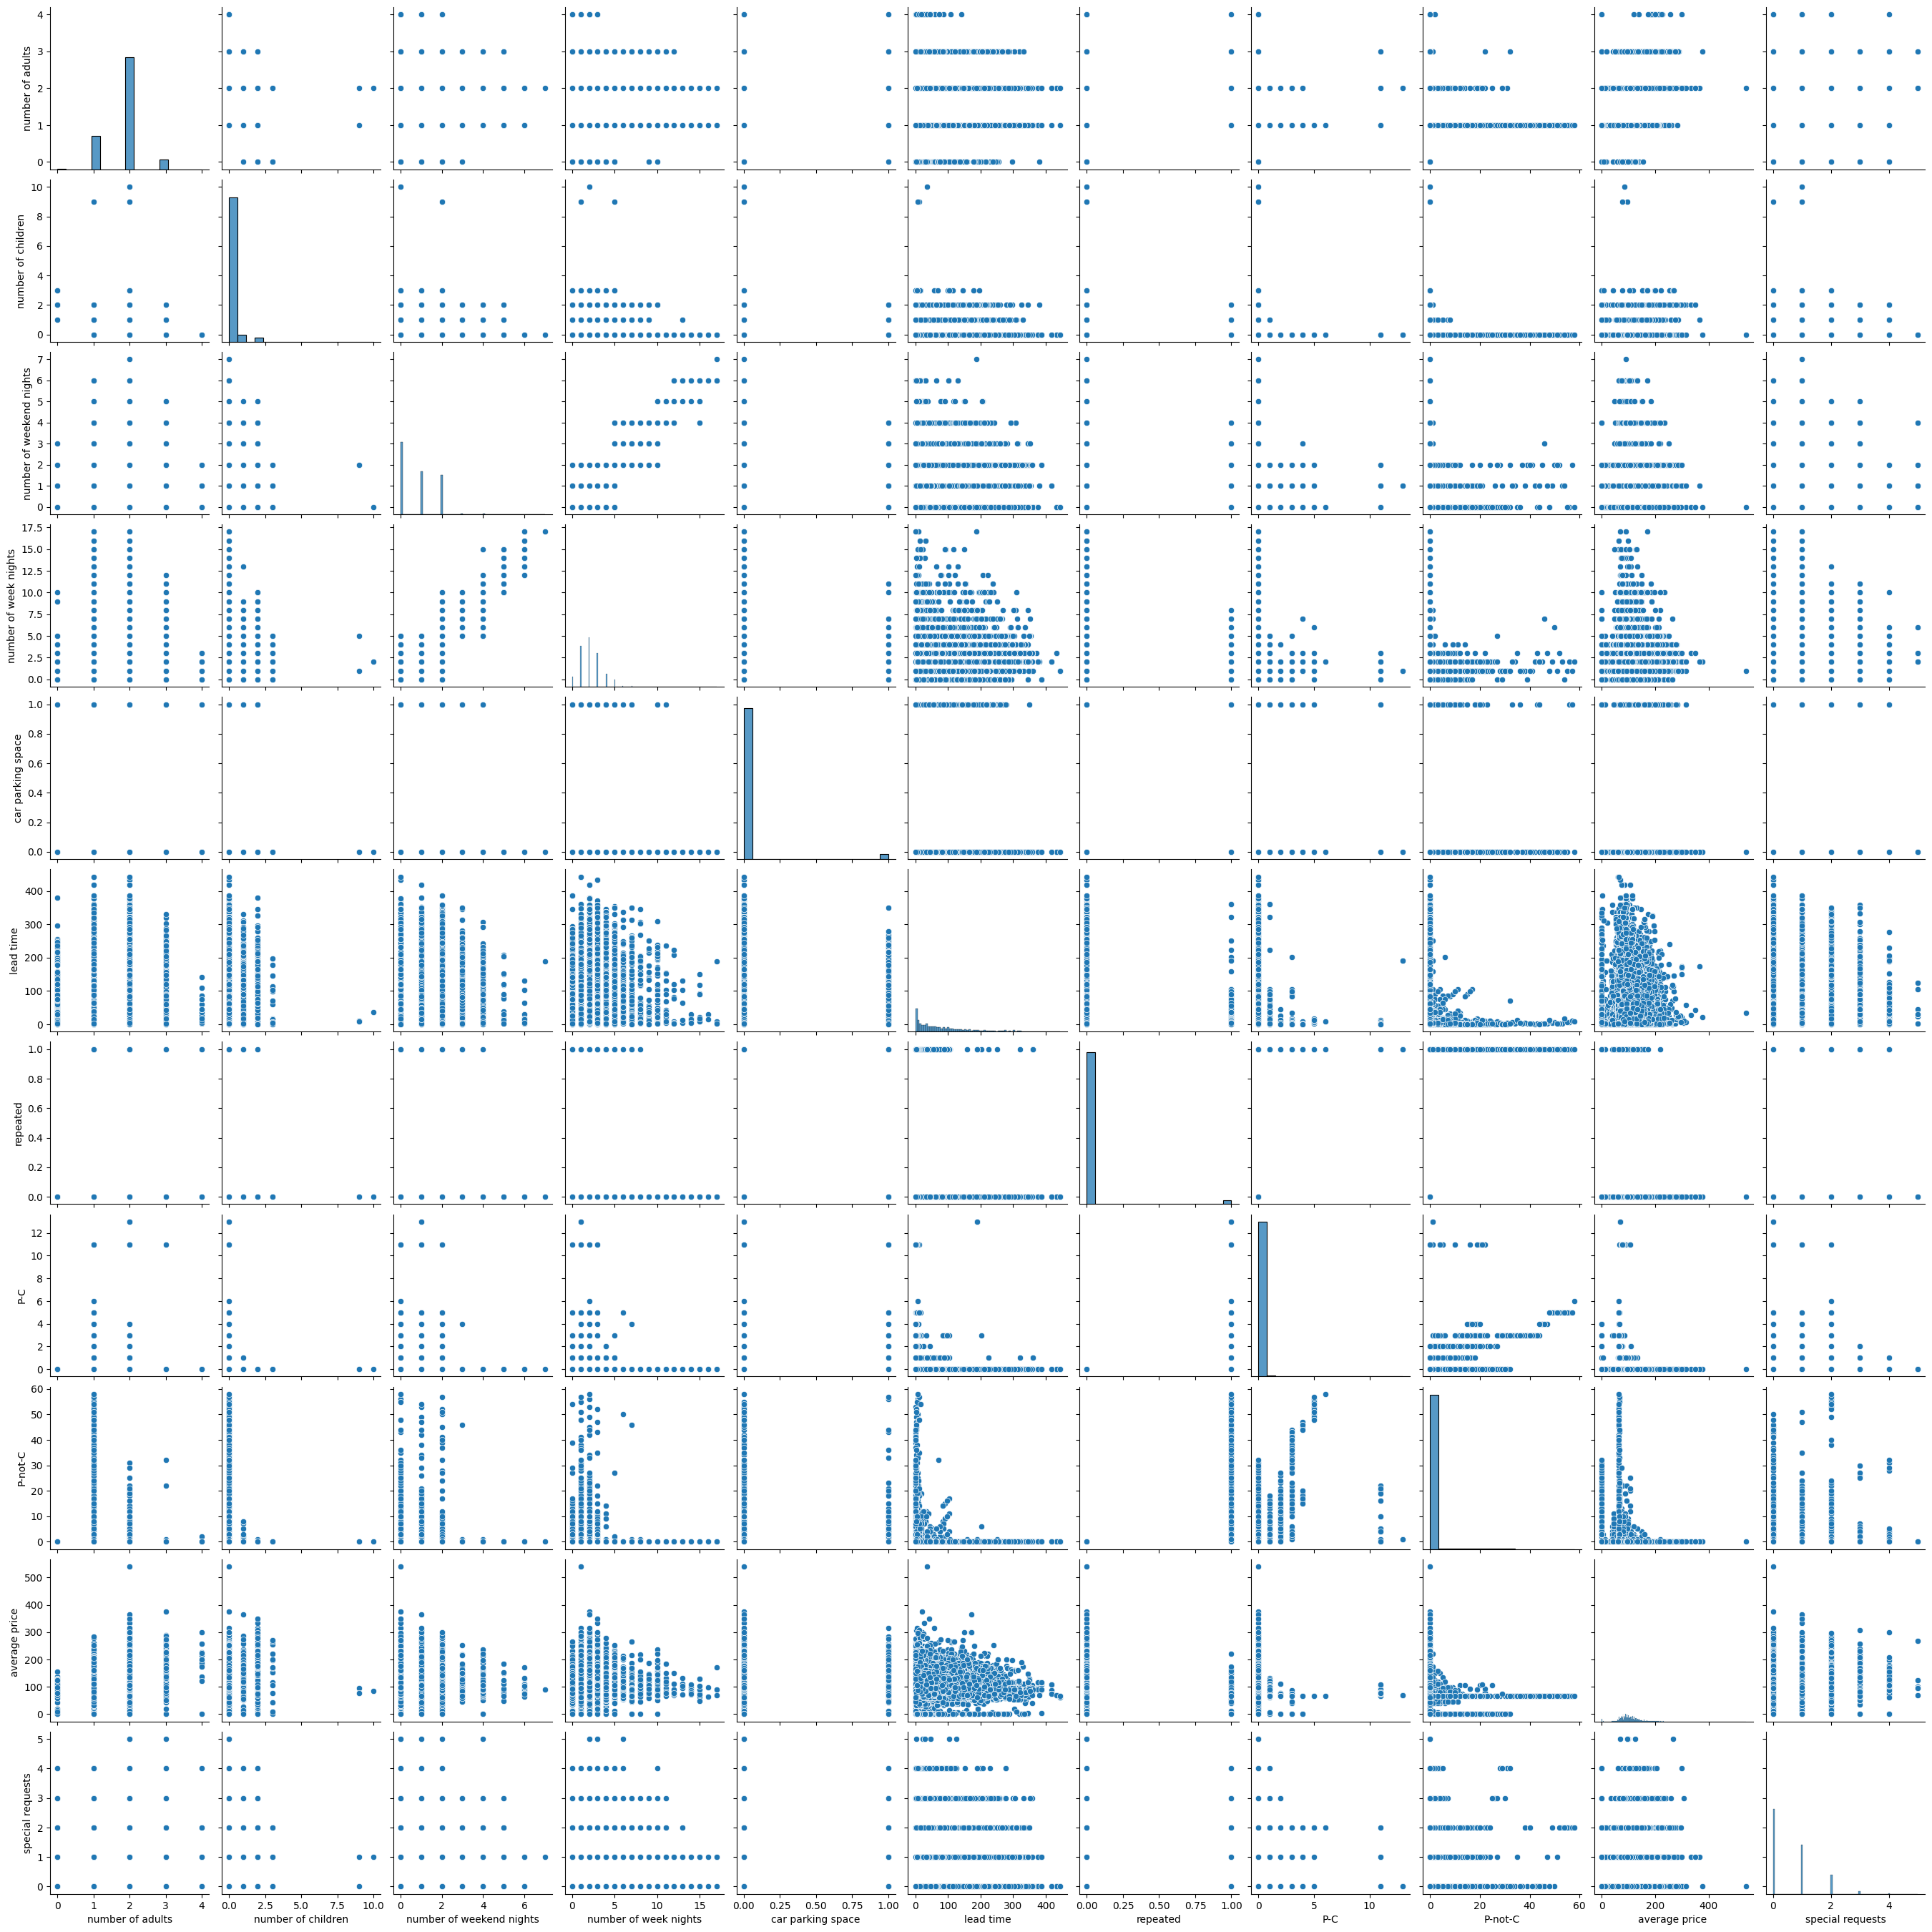

In [ ]:
sns.pairplot(data)

## Remove Outliers

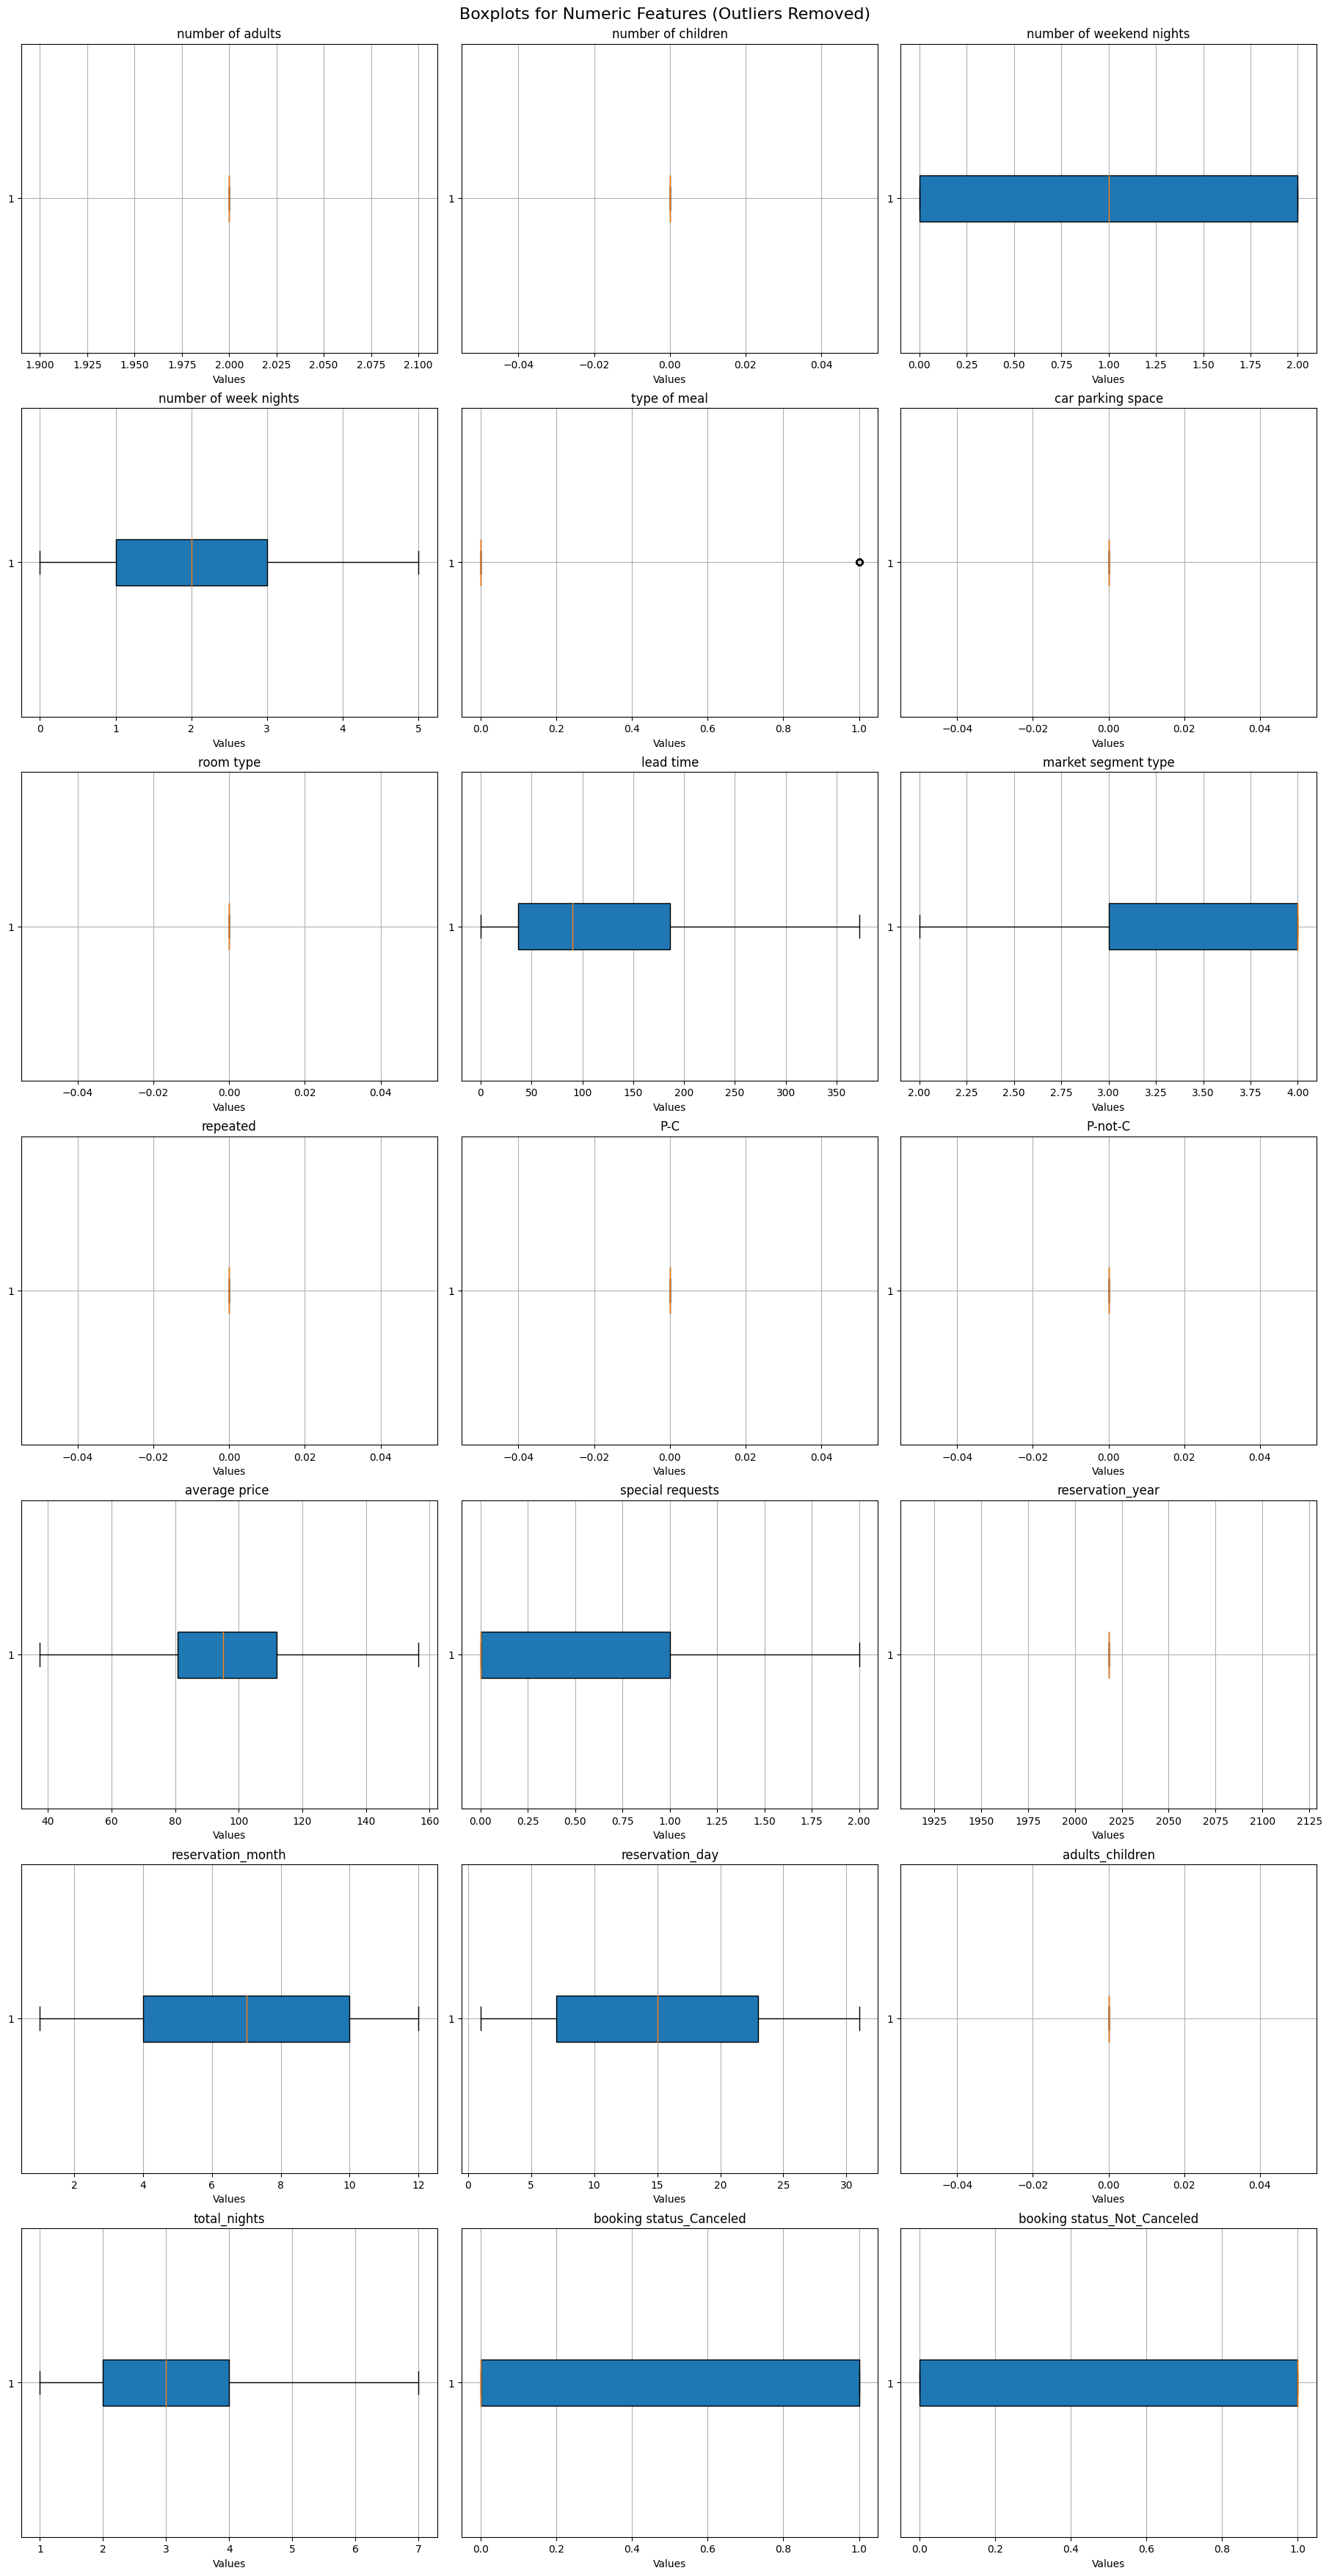

In [127]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

data = remove_outliers(data, numeric_columns)
num_features = len(numeric_columns)

num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Round up division

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 5), constrained_layout=True)

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(data[column], vert=False, patch_artist=True, showfliers=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Values')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots for Numeric Features (Outliers Removed)', fontsize=16)

plt.show()

In [128]:
print(data['room type'].value_counts())
data.describe()
data['room type'].hist()

room type
0    10385
Name: count, dtype: int64


<Axes: >

## Label Encoding

In [125]:
data = pd.get_dummies(data, columns=['booking status'])

In [126]:
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = data.select_dtypes(include=['object', 'bool']).columns

label_encoder = LabelEncoder()

for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])

data.head()



number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  type of meal  car parking space  room type  \
0                      5             0                  0          0   
1                      3             3                  0          0   
2                      3             0                  0          0   
3                      2             0                  0          0   
4                      2             3                  0          0   

   lead time  market segment type  repeated  ...  P-not-C  average price   \
0        224                    3         0  ...        0           88.00   
1          5                    4         0  ...        0          106.68   
2          1                    4         0  ...        0           50.00   
3        211                    4         0  ...        0          100.00   
4         48                    4         0  ...        0           77.00   

   special requests  reservation_year  reservation_month  reservation_day  \
0                 0            2015.0               10.0              2.0   
1                 1            2018.0               11.0              6.0   
2                 0            2018.0                2.0             28.0   
3                 1            2017.0                5.0             20.0   
4                 0            2018.0                4.0             11.0   

   adults_children  total_nights  booking status_Canceled  \
0                1             7                        0   
1                0             4                        0   
2                2             4                        1   
3                0             2                        1   
4                0             3                        1   

   booking status_Not_Canceled  
0                            1  
1                            1  
2                            0  
3                            0  
4                            0  

[5 rows x 21 columns]

## Feature Engineering

In [76]:
# data = pd.read_csv(r'first inten project.csv')


  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  ...  P-C  P-not-C  average price   \
0  

In [129]:
data.isnull().sum()

number of adults               0
number of children             0
number of weekend nights       0
number of week nights          0
type of meal                   0
car parking space              0
room type                      0
lead time                      0
market segment type            0
repeated                       0
P-C                            0
P-not-C                        0
average price                  0
special requests               0
reservation_year               0
reservation_month              0
reservation_day                0
adults_children                0
total_nights                   0
booking status_Canceled        0
booking status_Not_Canceled    0
dtype: int64

In [131]:
data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'reservation_year',
       'reservation_month', 'reservation_day', 'adults_children',
       'total_nights', 'booking status_Canceled',
       'booking status_Not_Canceled'],
      dtype='object')

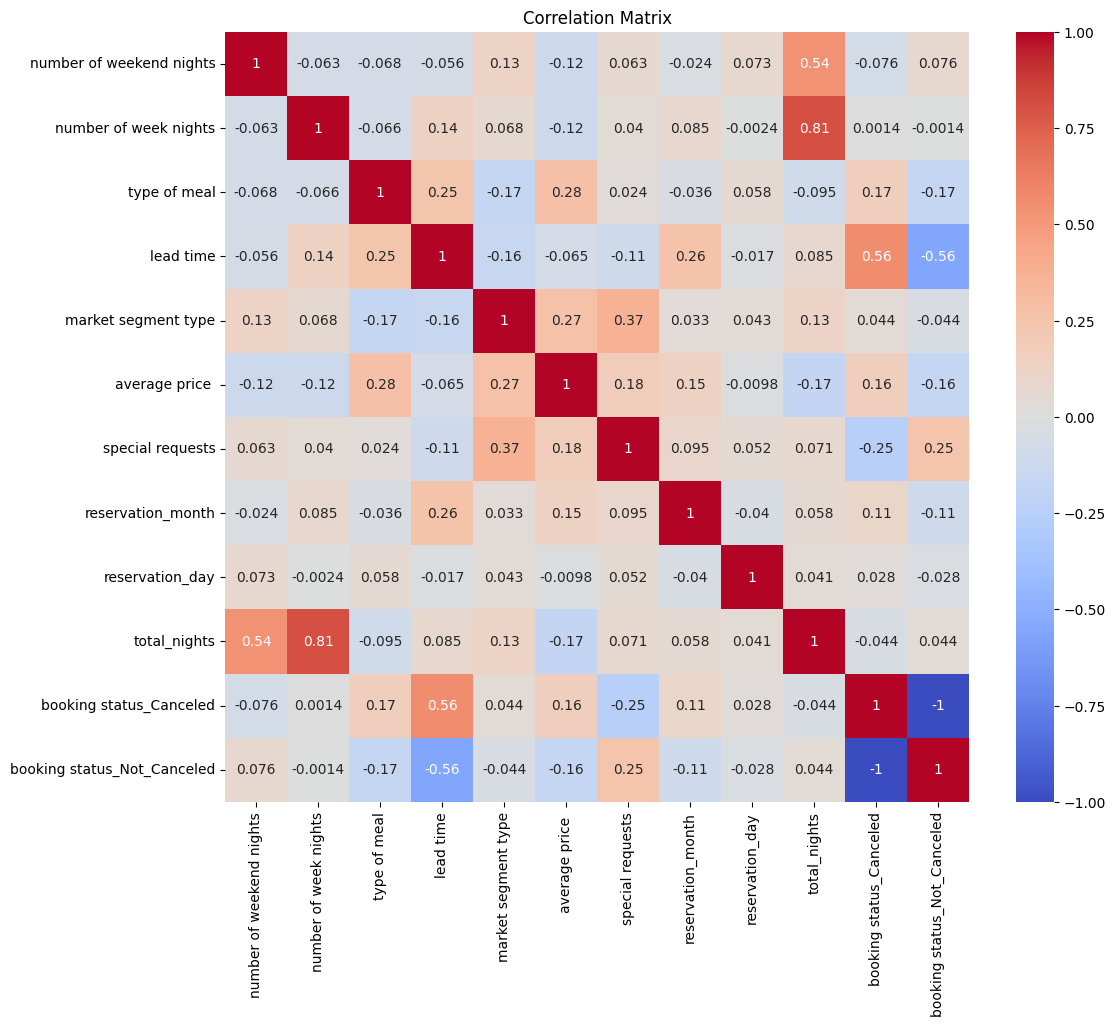

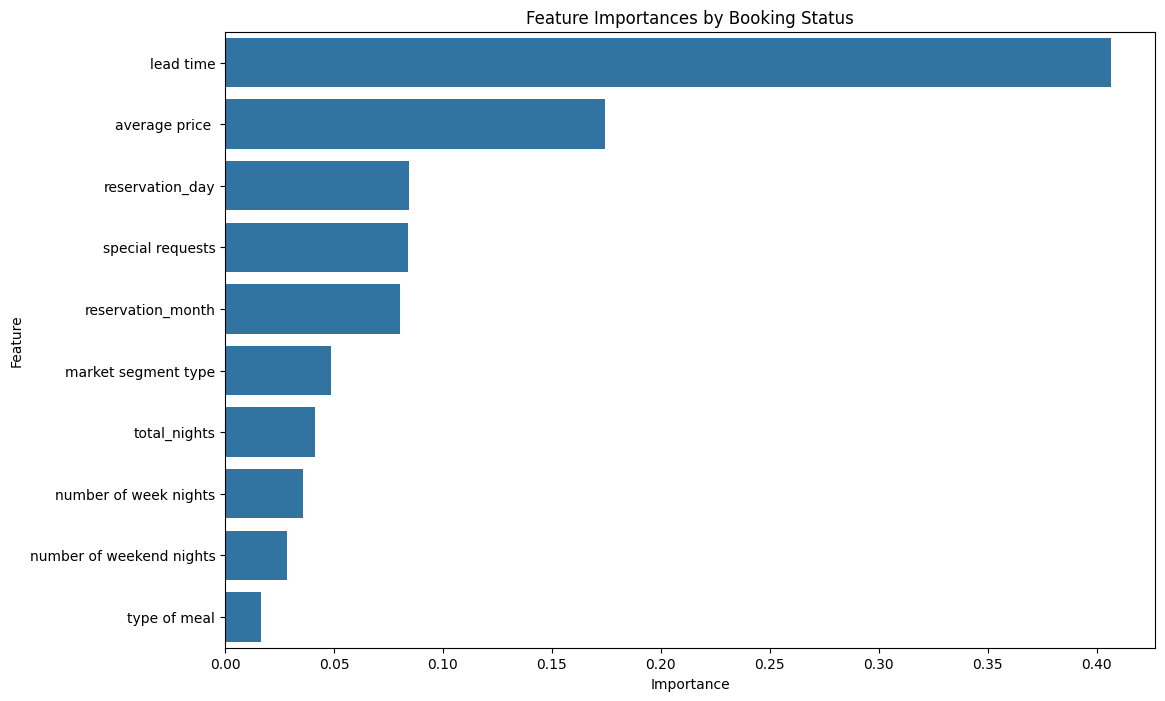

Selected features: ['lead time', 'average price ', 'reservation_day', 'special requests', 'reservation_month', 'market segment type', 'total_nights', 'number of week nights', 'number of weekend nights', 'type of meal']


In [151]:
from sklearn.ensemble import RandomForestClassifier
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

data = data.loc[:, (data != data.iloc[0]).any()]

y = data['booking status_Canceled']
X = data.drop(['booking status_Canceled', 'booking status_Not_Canceled'], axis=1)

# X = data.drop('booking status', axis=1)
# y = data['booking status']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances by Booking Status')
plt.show()

selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
print("Selected features:", selected_features.tolist())

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg_l1.fit(X, y)

sfm = SelectFromModel(logreg_l1, prefit=True)
X_lasso = sfm.transform(X)

selected_features_lasso = X.columns[sfm.get_support()]

print("Selected features by L1 Regularization:", selected_features_lasso.tolist())

Selected features by L1 Regularization: ['number of week nights', 'type of meal', 'lead time', 'market segment type', 'average price ', 'special requests', 'reservation_month', 'reservation_day', 'total_nights']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Train Test Split

In [153]:
selected_features_combined = list(set(selected_features) | set(selected_features_lasso))

In [154]:
from sklearn.model_selection import train_test_split

selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
print("Selected features:", selected_features.tolist())

X = data[selected_features_combined]

y = data['booking status_Not_Canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Selected features: ['lead time', 'average price ', 'reservation_day', 'special requests', 'reservation_month', 'market segment type', 'total_nights', 'number of week nights', 'number of weekend nights', 'type of meal']
X_train shape: (8308, 10)
X_test shape: (2077, 10)
y_train shape: (8308,)
y_test shape: (2077,)


In [144]:
data.head()

number of weekend nights  number of week nights  type of meal  lead time  \
15                         0                      2             1        256   
22                         2                      4             0          2   
23                         0                      3             0         37   
25                         0                      2             0         99   
31                         2                      2             0        107   

    market segment type  average price   special requests  reservation_month  \
15                    4           115.0                 1                6.0   
22                    3            85.0                 0                3.0   
23                    3           105.0                 0               10.0   
25                    4           114.3                 1                4.0   
31                    4            87.5                 1               11.0   

    reservation_day  total_nights  booking status_Canceled  \
15             15.0             2                        1   
22             20.0             6                        0   
23             13.0             3                        0   
25             28.0             2                        0   
31             13.0             4                        0   

    booking status_Not_Canceled  
15                            0  
22                            1  
23                            1  
25                            1  
31                            1

## Modeling

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       831
           1       0.81      0.88      0.84      1246

    accuracy                           0.80      2077
   macro avg       0.80      0.78      0.79      2077
weighted avg       0.80      0.80      0.80      2077



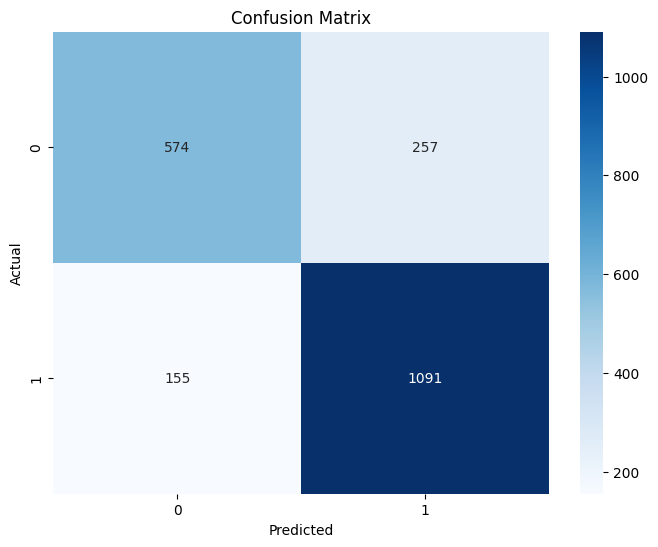

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Tuning

Best parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       831
           1       0.81      0.88      0.84      1246

    accuracy                           0.80      2077
   macro avg       0.80      0.78      0.79      2077
weighted avg       0.80      0.80      0.80      2077



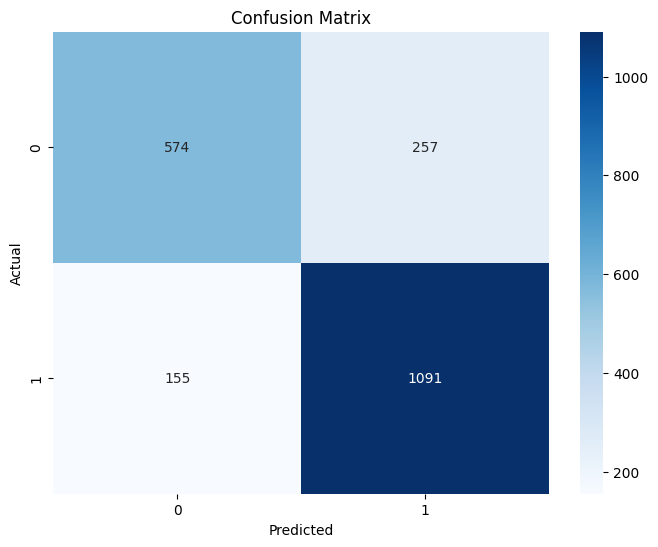

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris


# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [1000]
}

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_logreg = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

best_logreg.fit(X_train, y_train)

y_pred = best_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Blotting

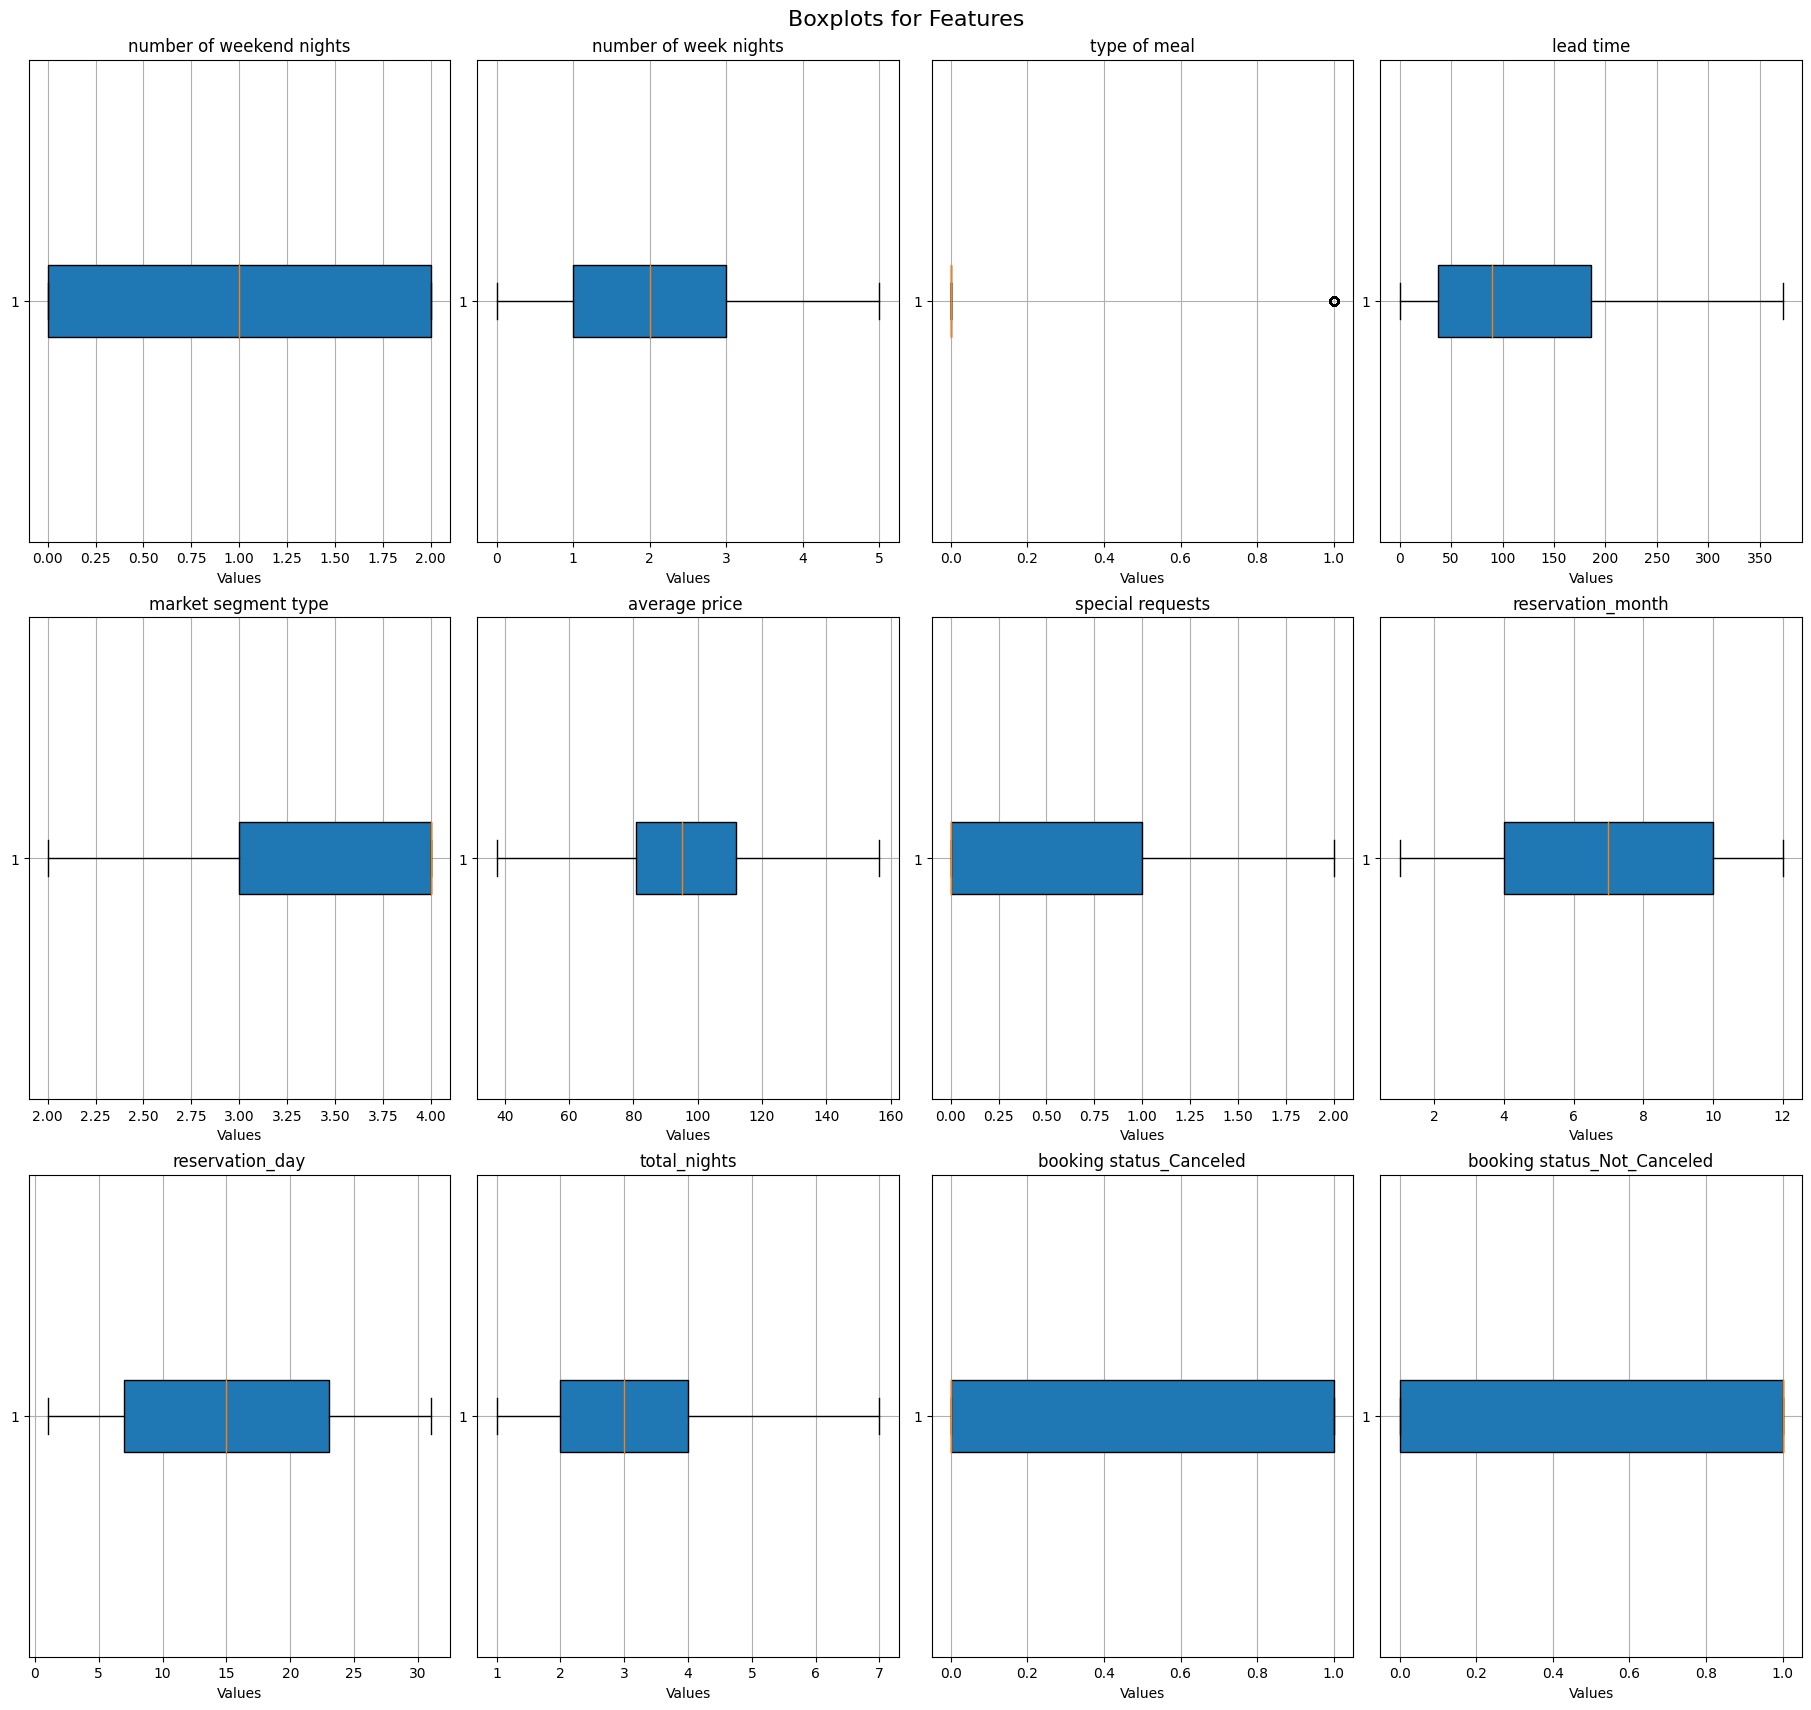

In [140]:
# data = pd.read_csv(r'first inten project.csv')

numeric_columns = data.select_dtypes(include=['number']).columns

num_features = len(numeric_columns)
num_rows = (num_features + 2)
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 5), constrained_layout=True)

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(data[column], vert=False, patch_artist=True, showfliers=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Values')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set overall title
plt.suptitle('Boxplots for Features', fontsize=16)

# Show the plot
plt.show()

(546, 1)
(546, 1)


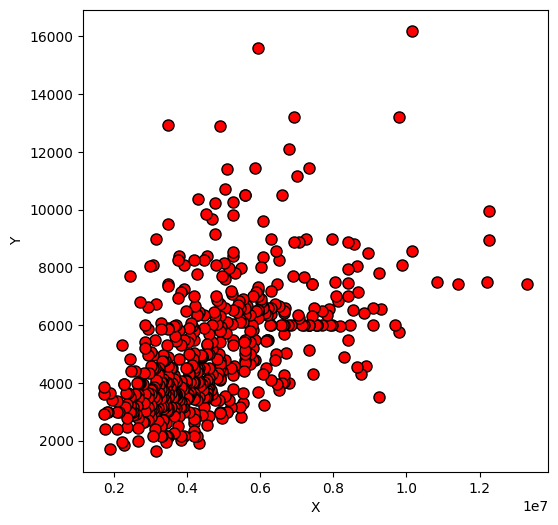

In [ ]:
X = np.array(data[:,0])
Y = np.array(data[:,1])
X = X.reshape(X.shape[0],-1)
Y = Y.reshape(Y.shape[0],-1)
print(X.shape)
print(Y.shape)

plt.figure(figsize = (6,6))
plt.plot(X , Y , 'ro', ms = 8 , mec = 'k')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
print(X[:4])
print(Y[:4])


[[      nan]
 [13300000.]
 [12250000.]
 [12250000.]]
[[  nan]
 [7420.]
 [8960.]
 [9960.]]


## Extract Model

In [150]:
import joblib

joblib.dump(best_logreg, 'model.pkl')

loaded_model = joblib.load('model.pkl')

y_predicted =loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80
